# Health Insurance Estimation 

We are trying to answer a question of which factors influence the cost of Health Insurance

# Roadmap


1. Data Collection and Analysis


2. Data distribuation in the dataset


3. Data Vizualizing and Understanding


4. Correlation between features and the respone


5. Data Pre-Processing


5. Machine Learning Models


6. Models Comaprison


7. Building a Predictive System


8. Saving the models


9. Conclusion and Observations

# Importing the necessary libraries

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Data Collection and Analysis

Loading the data from csv file to Pandas Dataframe

In [168]:
insurance_dataset = pd.read_csv("insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset info and analysis

In [169]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
    duplicated = len(dataframe[dataframe.duplicated()])
    print(f'There ara {duplicated} duplicated rows')
    dataframe = dataframe.drop_duplicates()
    print(f'{duplicated} duplicated rows is dropped')
check_data(insurance_dataset)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------     Data Shape     --------------------
(1338, 7)

--------------------  The First 5 Data  --------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705   

# Data distribuation in the dataset

Distribuation of Age value

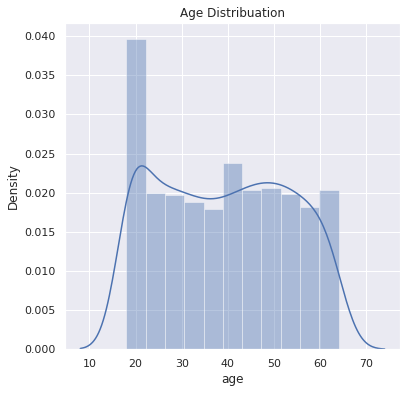

In [170]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribuation')
plt.show()

Distribuation of BMI

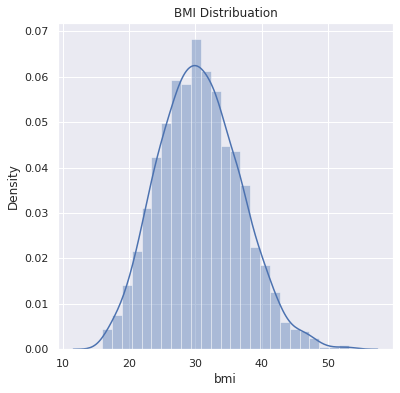

In [171]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribuation')
plt.show()

Distribuation of Charges

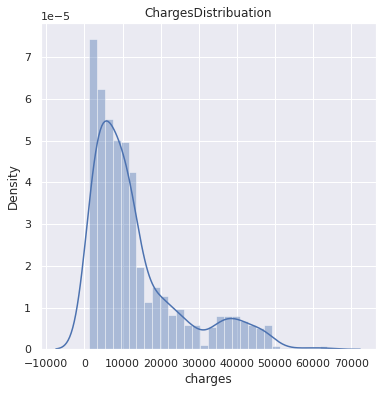

In [172]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('ChargesDistribuation')
plt.show()

Distribuation of Gender

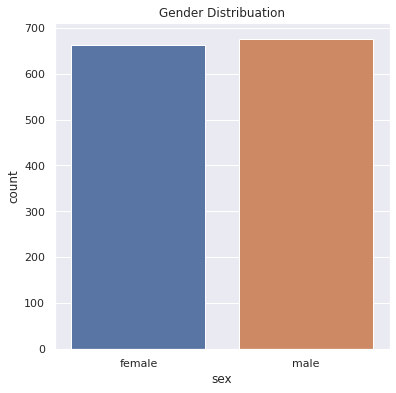

male      676
female    662
Name: sex, dtype: int64


In [173]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Gender Distribuation')
plt.show()

print(insurance_dataset['sex'].value_counts())

Distribuation of Children

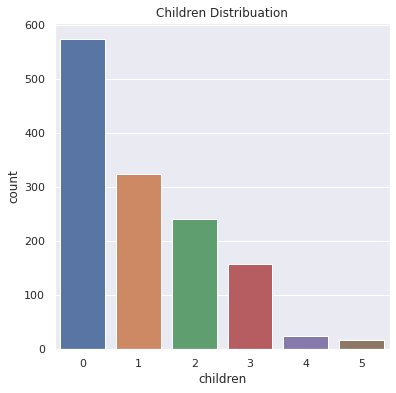

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [174]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Children Distribuation')
plt.show()

print(insurance_dataset['children'].value_counts())

Distribuation of Smoker

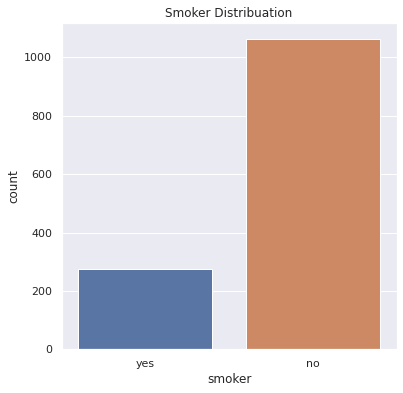

no     1064
yes     274
Name: smoker, dtype: int64


In [175]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smoker Distribuation')
plt.show()

print(insurance_dataset['smoker'].value_counts())

Distribuation of Region

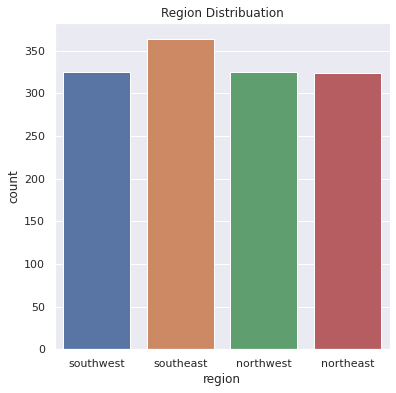

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [176]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region Distribuation')
plt.show()

print(insurance_dataset['region'].value_counts())

# Data Vizualizing and Understanding

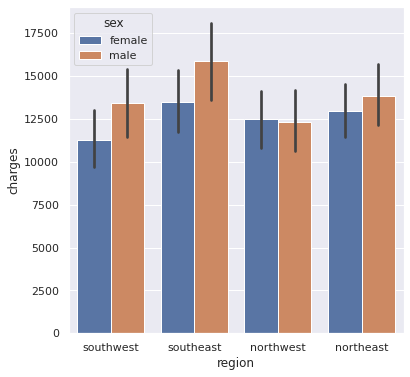

In [177]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=insurance_dataset)

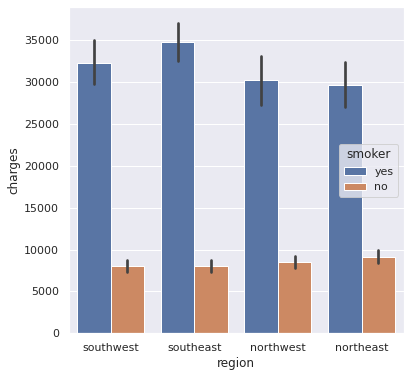

In [178]:
f, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data= insurance_dataset)

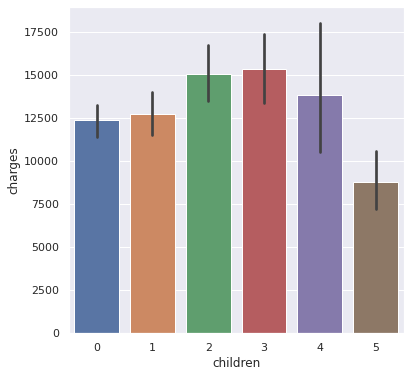

In [179]:
f, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.barplot(x = 'children', y = 'charges', data=insurance_dataset)

Men's insurance charges are higher than women's in regions other than the North West. Smoker's insurance charges are higher than no smoker and southeast is the most smoking area. There is no strong  relationship between the number of children and insurance.

# Correlation between features and the respone

In [180]:
insurance_dataset.corr().charges[:-1]

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

The correlation of the numerical variables with the charges shows that both 'age' and 'bmi' have a modest correlation with the response variable (charges). However, the relationship is not as strong for number of children.

In [215]:
def cat_hist(feature, response, dataset = insurance_dataset):
    sns.histplot(x = response, data = dataset, hue = feature, bins = 20, kde = 'True')

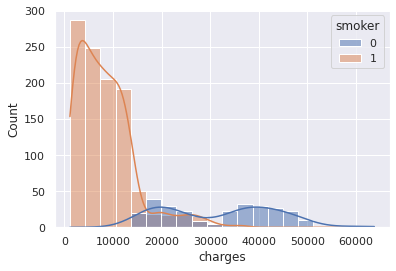

In [216]:
cat_hist('smoker', 'charges')

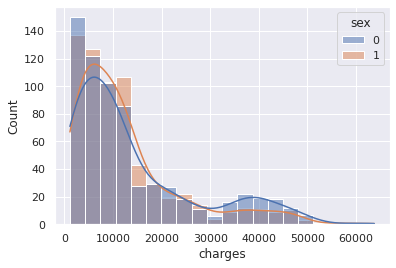

In [217]:
cat_hist('sex', 'charges')

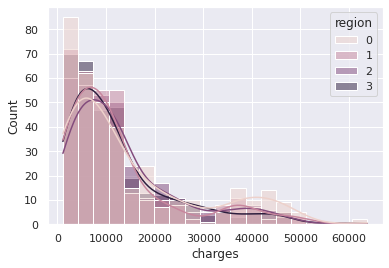

In [219]:
cat_hist('region', 'charges')

The first plot shows that smokers are much more likely to be charged more. However, the second and the third plots show that sex and the  region do not appear to have a visible relationship with the response variable.

# Data Pre-Processing

Encoding the Categorical features

In [181]:
# Encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # Encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# Encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Machine Learning Model

# Linear Regression

Splitting the Features and Target

In [182]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

Splitting the data into Training data & Testing Data

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [184]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [185]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [186]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2_score (train):', r2_train)

# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R 2_score (test): ', r2_test)

print("Model Score: ", regressor.score(X_test, Y_test))

R2_score (train): 0.751505643411174
R 2_score (test):  0.7447273869684077
Model Score:  0.7447273869684077


# Support Vector Machine (Regression)

Splitting the Features and Target and reshaping

In [187]:
X_c = insurance_dataset.drop('charges',axis=1).values
Y_c = insurance_dataset['charges'].values.reshape(-1,1)

Splitting the data into Training data & Testing Data

In [188]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c,Y_c,test_size=0.2, random_state=42)

Scaling the data

In [189]:
#X_train_scaled = StandardScaler().fit_transform(X_train_c)
#Y_train_scaled = StandardScaler().fit_transform(Y_train_c)
#X_test_scaled = StandardScaler().fit_transform(X_test_c)
#Y_test_scaled = StandardScaler().fit_transform(Y_test_c)

SVM and GridSearch

In [190]:
svr = SVR()
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, Y_train.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 4/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.082 total time=   0.9s
[CV 7/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.136 total time=   0.4s
[CV 1/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.099 total time=   0.3s
[CV 4/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.082 total time=   0.3s
[CV 9/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.106 total time=   0.2s
[CV 2/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.148 total time=   0.2s
[CV 6/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.159 total time=   0.2s
[CV 10/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.059 total time=   0.2s
[CV 3/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.087 total time=   0.2s
[CV 7/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.136 total time

[CV 2/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.148 total time=   1.0s
[CV 8/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.111 total time=   0.4s
[CV 2/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.148 total time=   0.3s
[CV 5/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.148 total time=   0.3s
[CV 8/10] END C=0.001, gamma=0.001, kernel=sigmoid, tol=0.0001;, score=-0.111 total time=   0.3s
[CV 3/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.087 total time=   0.2s
[CV 7/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.136 total time=   0.2s
[CV 1/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.099 total time=   0.2s
[CV 5/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.148 total time=   0.2s
[CV 8/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.111 total time=   0.2s
[CV 2/10] END C=0.001, gamma=0.1, kernel=rbf, tol=0

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

Model Evaluation

In [191]:
svr = SVR(C=100, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, Y_train_scaled.ravel())
print(svr_grid.best_estimator_)

SVR(C=100, gamma=0.1, tol=0.0001)


In [192]:
Y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(Y_train_scaled, Y_pred_svr_train)

Y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(Y_test_scaled, Y_pred_svr_test)

print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print("Model Score: ", svr.score(X_test_scaled, Y_test_scaled))

R2_score (train) : 0.873
R2 score (test) : 0.855
Model Score:  0.8549922306741429


# Decision Tree

In [193]:
param= {'max_depth' : (2,3,4,5,6,7,8,9)
             
              , 'max_features' : (2,3,4,5,6,7,8)
              , 'min_samples_split' : (2,4,6,8,10,12)}

In [194]:
tree_grid  = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=  param, cv = 5, 
                          verbose = True)

In [195]:
tree_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': (2, 3, 4, 5, 6, 7, 8, 9),
                         'max_features': (2, 3, 4, 5, 6, 7, 8),
                         'min_samples_split': (2, 4, 6, 8, 10, 12)},
             verbose=True)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [196]:
print(tree_grid.best_estimator_)

DecisionTreeRegressor(max_depth=4, max_features=3, random_state=42)


In [197]:
tree_best = DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_split=12,
                      random_state=42)
tree_best.fit(X_train, Y_train)
predict_tree = tree_best.predict(X_test)
print(r2_score(Y_test, predict_tree))

0.8555469163044708


In [198]:
tree_best = DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_split=12,
                      random_state=42)
tree_best.fit(X_train, Y_train)

Y_pred_tree_train = tree_best.predict(X_train)
r2_score_tree_train = r2_score(Y_train, Y_pred_tree_train)

Y_pred_tree_test = tree_best.predict(X_test)
r2_score_tree_test = r2_score(Y_test, Y_pred_tree_test)

print('R2_score (train):', r2_score_tree_train)
print('R 2_score (test): ',r2_score_tree_test )
print("Model Score: ", tree_best.score(X_test, Y_test))

R2_score (train): 0.8626030345502159
R 2_score (test):  0.8555469163044708
Model Score:  0.8555469163044708


# RandomForest Regressor

In [199]:
param= {'max_depth' : (2,3,4,5,6,7,8,9)
             
              , 'max_features' : (2,3,4,5,6,7,8)
              , 'min_samples_split' : (2,4,6,8,10,12)
             }

In [200]:
rnd_grid  = RandomizedSearchCV(RandomForestRegressor(random_state= 42), param_distributions=  param, cv = 5, 
                          verbose = True)

In [201]:
rnd_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': (2, 3, 4, 5, 6, 7, 8, 9),
                                        'max_features': (2, 3, 4, 5, 6, 7, 8),
                                        'min_samples_split': (2, 4, 6, 8, 10,
                                                              12)},
                   verbose=True)

In [202]:
print(rnd_grid.best_estimator_)

RandomForestRegressor(max_depth=5, max_features=6, random_state=42)


In [203]:
predict_rnd = rnd_best.predict(X_test)
r2_score(Y_test, predict_rnd)

0.865228489995567

In [204]:
rnd_best = RandomForestRegressor(max_depth=6, max_features=4, min_samples_split=8,
                      random_state=42)
rnd_best.fit(X_train, Y_train)

Y_pred_rnd_train = rnd_best.predict(X_train)
r2_score_rnd_train = r2_score(Y_train, Y_pred_rnd_train)

Y_pred_rnd_test = rnd_best.predict(X_test)
r2_score_rnd_test = r2_score(Y_test, Y_pred_rnd_test)

print('R2_score (train):', r2_score_rnd_train)
print('R 2_score (test): ',r2_score_rnd_test )
print("Model Score: ", rnd_best.score(X_test, Y_test))

R2_score (train): 0.8991555172363184
R 2_score (test):  0.865228489995567
Model Score:  0.865228489995567


# Models Comparison

In [205]:
models = [('Linear Regression',regressor.score(X_test, Y_test), r2_train, r2_test),
          ('Support Vector Regression',svr.score(X_test_scaled, Y_test_scaled), r2_score_svr_train, r2_score_svr_test),
          ('Decision Tree',tree_best.score(X_test, Y_test),  r2_score_tree_train, r2_score_tree_test),
          ('Random Forest Regression',rnd_best.score(X_test,Y_test), r2_score_rnd_train, r2_score_rnd_test)   
         ]

In [206]:
predict = pd.DataFrame(data = models, columns=['Model','Model Score','R2_Score(training)', 'R2_Score(test)'])
predict

,Model,Model Score,R2_Score(training),R2_Score(test)
0,Linear Regression,0.744727,0.751506,0.744727
1,Support Vector Regression,0.854992,0.873364,0.854992
2,Decision Tree,0.855547,0.862603,0.855547
3,Random Forest Regression,0.865228,0.899156,0.865228


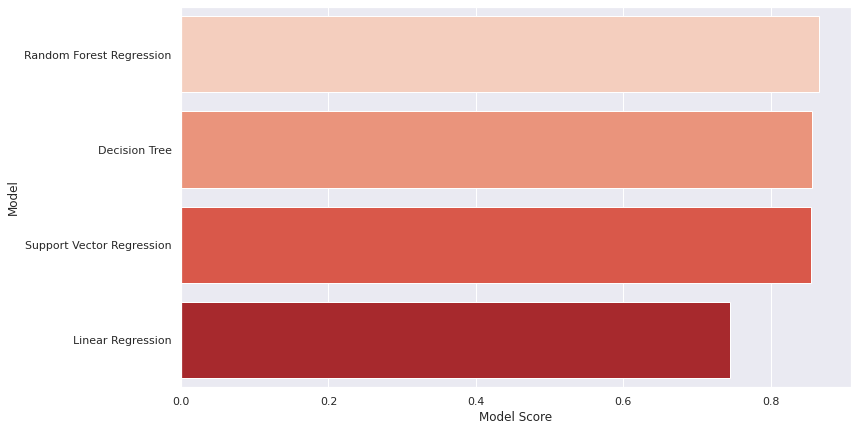

In [207]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Model Score'], ascending=False, inplace=True)

sns.barplot(x='Model Score', y='Model',data = predict, palette='Reds')
plt.xlabel('Model Score')
plt.ylabel('Model')
plt.show()

# Building a Predictive System

31 years old female with a bmi of 25.74 who does'nt have any children who smokes and lives in the Southeast

In [208]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.080576496046


# Conclusion and Observations

* Smoking is the biggest factor influencing medical cost fees, followed by body mass index and age.
* The insurance cost of a non-smoker is less than that of a smoker.
* The higher the age, the higher the insurance cost value.
* Regional differences and gender do not have a significant impact on insurance costs.

# Saving the models

# Linear Regression

In [209]:
import pickle

Pkl_Filename = "LinearRegression.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)

Load the Model back from file


In [210]:
with open(Pkl_Filename, 'rb') as file:  
    model1 = pickle.load(file)

In [211]:
model1 

LinearRegression()

# Support Vector Regression

In [212]:
import pickle

Pkl_Filename = "SupportVectorMachines.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(svr, file)
    
with open(Pkl_Filename, 'rb') as file:  
    model2 = pickle.load(file)

model2

SVR(C=100, gamma=0.1, tol=0.0001)

# Decision Tree Regression

In [213]:
import pickle

Pkl_Filename = "DecisionTree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree_best, file)
    
with open(Pkl_Filename, 'rb') as file:  
    model3 = pickle.load(file)

model3

DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_split=12,
                      random_state=42)

# Random Forest Regression

In [214]:
import pickle

Pkl_Filename = "RandomForest.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rnd_best, file)
    
with open(Pkl_Filename, 'rb') as file:  
    model4 = pickle.load(file)

model4

RandomForestRegressor(max_depth=6, max_features=4, min_samples_split=8,
                      random_state=42)

# Conclusion and Observations

Random Forest Model gave the highest accuracy of 86% for the Health Insurance Amount Estimation. Hence, the Random Forest Model will be used for deployment. 